# PREDICT SURVIVED PASSENGERS OF R.M.S. TITANIC
## *Using Logistic Regression*
![titanic](titanic.jpg)

In [111]:
## Import Common Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [112]:
## Import Data Set to DataFrame
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


<hr>

## 1. Data Understanding and Data Wrangling

In [113]:
## Show Column Information
df.info()
## Result: Null value detected on several columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [114]:
## Conventional Way to Detect Missing Value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

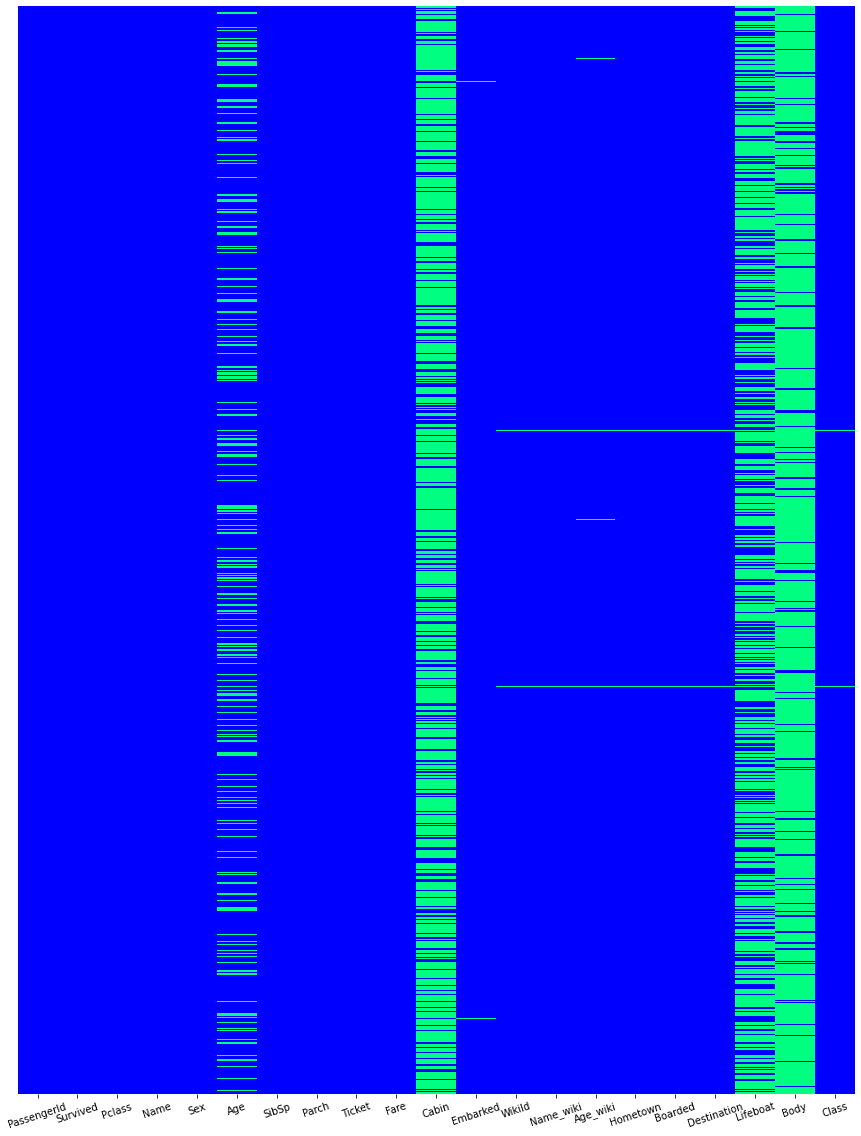

In [115]:
## Visualize Missing Value with Heatmap
plt.figure(figsize=(15,20))
sns.heatmap(df.isna(),cmap='winter',cbar=False,yticklabels=False)
plt.xticks(rotation=18)
plt.show()
## Interpretation: light blue color indicates missing value

<hr>

### Imbalance Checking (Distribution of Target)

1. Case study: checking airplane delay or not -> we had target column of delay consist of Yes or No
    - If there's `minutes delay` as our feature, we need to drop because it has direct correlation to target (the correlation must be high because if `minutes delay` have value, target will always have Yes value)

2. Case Study: predict employee will resign/out or not
    - If there's `termination date` or `termination reason` as our feature, we need to drop them because employee must have resigned if the either of them features have value

3. Our Case (Titanic): we want to predict the survived passengers
    - We have `Lifeboat` and `Body` as the features
        - if `Lifeboat` have value, it means that the passengers was survived and were placed on a lifeboat.
        - if `Body` have value, it means that the passengers did not survived because their body were found.

In [116]:
## Determine number of died and survived passengers
df['Survived'].value_counts()
## Info: 0 means died, 1 means survived

0.0    549
1.0    342
Name: Survived, dtype: int64

In [117]:
## Present as percentage
(pd.crosstab(df['Survived'],columns='%',normalize=True)*100).round(2)
## Analysis: if proportion of one particular value in target above 75%, the data is imbalanced.
### We would need to determine the Label (detector) of that particular value.

col_0,%
Survived,
0.0,61.62
1.0,38.38


<hr>

In [118]:
## Describe Data
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body
count,891,891,891,204,889,889,889,889,889,345,87
unique,891,2,681,147,3,889,437,4,234,22,87
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,"Braund, Mr. Owen Harris","New York, New York, US",Southampton,New York City,15,175MB
freq,1,577,7,4,644,1,50,638,168,28,1


In [119]:
# Describe Data
TitanicDesc=[]
for i in df.columns:
    TitanicDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/len(df))*100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(TitanicDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

## Result: we have 21 columns, 11 of them are objects while the rest have data type of either float or integer
### Body, Cabin and Age have null row above 50% of its value.

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,PassengerId,int64,0,0.00,891,"[507, 582]"
1,Survived,float64,0,0.00,2,"[1.0, 0.0]"
2,Pclass,int64,0,0.00,3,"[3, 2]"
3,Name,object,0,0.00,891,"[Lefebre, Miss. Ida, Weisz, Mrs. Leopold (Math..."
4,Sex,object,0,0.00,2,"[female, male]"
5,Age,float64,177,19.87,88,"[23.5, 66.0]"
6,SibSp,int64,0,0.00,7,"[0, 3]"
7,Parch,int64,0,0.00,7,"[5, 0]"
8,Ticket,object,0,0.00,681,"[CA 2144, 54636]"
9,Fare,float64,0,0.00,248,"[49.5042, 7.8292]"


<hr>

### Quick Exploratory Data Analysis (EDA)
    We aim to perform Feature Selection with domain/business knowledge, instead of gaining insights from the data

In [120]:
## Drop Body and Lifeboat as analyzed in Imbalanced Checking
df.drop(columns=['Body','Lifeboat'],inplace=True)

In [121]:
## Drop Cabin and Class since they provide the same information as Pclass.
### We picked Pclass rather than two others since both Cabin and Class had missing value of 77.1% and 0.22%, respectively.
### Pclass did not have missing value.
df.drop(columns=['Cabin','Class'],inplace=True)

#### Hypothesis Testing

##### Build Hypothesis
1. `Pclass` have impact towards Survival Rates
    - Passengers in highest class have higher chance to survive
2. `Sex` - Gender have impact towards Survival Rates 
    - Woman have higher chance to survive
3. `Age` have impact towards Survival Rates
    - Children and Seniors have higher chance to survive
4. `SibSp` (Sibling-Spouse) have impact towards Survival Rates
    - Passengers without any Sibling/Spouse onboard have higher chance to survive
5. `Parch` (Parent-Children) have impact towards Survival Rates
    - Passengers without Parents/Children onboard have higher chance to survive
6. `Embarked` - Boarded have impact towards Survival Rates
    - Passengers boarded from city with higher economic rates have higher chance to survive

##### Hypothesis Testing No. 1

In [122]:
df[['Pclass','Survived']].groupby('Pclass').count()
## Result: Class 3 has the most passengers among all class.
### Class 2 is the class with the least passengers.

,Survived
Pclass,
1,216
2,184
3,491


In [123]:
(df[['Pclass','Survived']].groupby('Pclass').mean()*100).round(2)
## Result: Passengers in Class 1 have highest survival rate with almost 63% of its passengers on this class survived.
### Passengers in Class 3 (which have the highest total passengers) have the lowest Survival Rates among all class in the Titanic.

,Survived
Pclass,
1,62.96
2,47.28
3,24.24


Insight:
- Class 1 have the highest Survival Rate among all class in the Titanic. It was most likely because Class 1 which have highest ticket price and translates into the passengers were more wealthy than passengers in other class, therefore in the event of emergency, the Titanic crews must have prioritize them in the evacuation process by placing them first in the lifeboat or providing them with life jacket before passengers in Class 2 or Class 3.

> Passengers Class have impact towards Survival Rates

##### Hypothesis Testing No. 2

In [124]:
(df[['Sex','Survived']].groupby('Sex').mean()*100).round(2)
## Result: Female have significantly higher survival rates than male

,Survived
Sex,
female,74.20
male,18.89


Insight:
- Woman most likely be prioritized for evacuation process since woman was seen to be more weaker than man, adding the fact that normal evacuation process usually prioritize woman, children and seniors before the gents. Pregnant woman was also prioritize, and usually children were being evacuated together with their mother in the lifeboat.

> Sex/Gender have impact towards Survival Rates

##### Hypothesis Testing No. 3 with Binning

In [125]:
## Handling Missing Value - Fill Missing Value with mean
df['Age_wiki']=df['Age_wiki'].fillna(df['Age_wiki'].mean())

In [126]:
## Create Age Group
age_bin=[0,10,20,40,df['Age_wiki'].max()]

In [127]:
## Create Label for each Age Group
labels=['Kids','Teenager','Adult','Senior']

In [128]:
## Combined into DataFrame
df['age_bin']=pd.cut(df['Age_wiki'],bins=age_bin,labels=labels)
df['age_bin']

0         Adult
1         Adult
2         Adult
3         Adult
4         Adult
         ...   
886       Adult
887    Teenager
888        Kids
889       Adult
890      Senior
Name: age_bin, Length: 891, dtype: category
Categories (4, object): ['Kids' < 'Teenager' < 'Adult' < 'Senior']

In [129]:
(df[['age_bin','Survived']].groupby('age_bin').mean()*100).round(2)
## Result: Kids have higher survival rates above other age groups.
### Other age group outside Kids have survival rates around 30%.

,Survived
age_bin,
Kids,56.94
Teenager,32.26
Adult,37.93
Senior,37.43


Insight:
- Two age group that were given priority for evacuation are kids and senior. In the event of limited lifeboats, kids must have been given higher priority to be placed into a lifeboat than senior. Even though seniors were placed in a lifeboat, they might not have been survived from the cold and died anyway while kids have longer life ahead of them.

> Age Group have impact towards Survival Rates

##### Hypothesis Testing No. 4

In [130]:
(df[['SibSp','Survived']].groupby('SibSp').mean()*100).round(2)
## Result: Passengers who were onboard with 1 and 2 siblings and/or spouse have the highest survival rates
### Passengers onboard without any siblings and/or spouse ranked third on survival rates 

,Survived
SibSp,
0,34.54
1,53.59
2,46.43
3,25.00
4,16.67
5,0.00
8,0.00


Insight:
- Passengers who had minimum of 1 sibling or spouse had the highest survival rates, compared to passengers who were not onboard without any or more than 1 sibling and/or spouse.
- Passengers who were onboard with more than 2 siblings and/or spouse, especially who were onboard with more than 4 spouse and/or siblings has the lowest survival rates.
- This result might be caused by the more siblings and/or spouse onboard, the passengers spend more time to save each other and in the end, lower their chances of survival.
> Number of siblings and/or spouse onboard have impact towards Survival Rates

##### Hypothesis Testing No. 5

In [131]:
(df[['Parch','Survived']].groupby('Parch').mean()*100).round(2)
## Result: Passengers with at least 3 parents and/or children onboard have the highest survival rates with range around 50-60 passengers survived
### Passengers who were travelled without parents/children onboard only having survival rate above who were onboard with more than 3 parents and/or children

,Survived
Parch,
0,34.37
1,55.08
2,50.00
3,60.00
4,0.00
5,20.00
6,0.00


Insight:
- The result could be connected to the high number of children survived, as children most of the time were travelled with their parents.
- The survival rates in this case might represent the number of children survived and were prioritized during evacuation process, also their mom which accompany them in the lifeboats or during the evacuation. 
> Number of parents and/or children onboard have impact towards Survival Rates

##### Hypothesis Testing No. 6

In [132]:
(df[['Boarded','Survived']].groupby('Boarded').mean()*100).round(2)
## Result: Passengers embarked from Cherbourg, France have higher survival rates compared to passengers embarked from other cities.
### Passengers embarked from the UK cities, Queenstown and Southampton, have similar survival rate ranging around 35

,Survived
Boarded,
Belfast,0.00
Cherbourg,56.02
Queenstown,38.16
Southampton,34.33


In [133]:
(pd.crosstab(index=df['Pclass'],columns=df['Boarded'],normalize=True)*100).round(2)
## Result: With Pclass 3 have the lowest survival rates, the table below shows that passengers in Class 3 mostly embarked from Southampton and Queenstown
### This could be translated into passengers embarked from Cherbourg had higher economic power and most of them bought the ticket for highest class
### Therefore their survival rates were higher compared to passengers embarked from Queenstown, Southampton or Belfast.

Boarded,Belfast,Cherbourg,Queenstown,Southampton
Pclass,,,,
1,0.34,9.56,0.00,14.29
2,0.67,1.80,0.34,17.89
3,0.00,7.31,8.21,39.60


#### DataFrame for Train

In [134]:
## Input features as analyze above that have impact towards target
df_1=df[['Survived','Pclass','Sex','SibSp','Parch','Embarked','Age_wiki']]

In [135]:
## Check Missing Value
df_1.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
Age_wiki    0
dtype: int64

In [136]:
## Handle Missing Value with fillna
df['Embarked'] = df_1['Embarked'].fillna('S')

In [137]:
## Confirm Missing Value after Update
df['Embarked'].isna().sum()

0

<hr>

### Encoding

In [138]:
## Convert value in column Sex into numeric
df_1['Sex']=df_1['Sex'].map({
    'male':0,
    'female':1
})
## .map() used for Label Encoding -> convert Text/Category (only Ordinal or Binary) into numeric

In [139]:
## Convert value in column Embarked with One-Hot Encoding
df_1=pd.get_dummies(df_1,columns=['Embarked'])
## One-Hot Encoding used to convert unsequential Text/Category into numeric
## Could be used on Binary, Ordinal or Nominal, but it better used for Nominal only, while Binary and Ordinal use Label Encoding instead

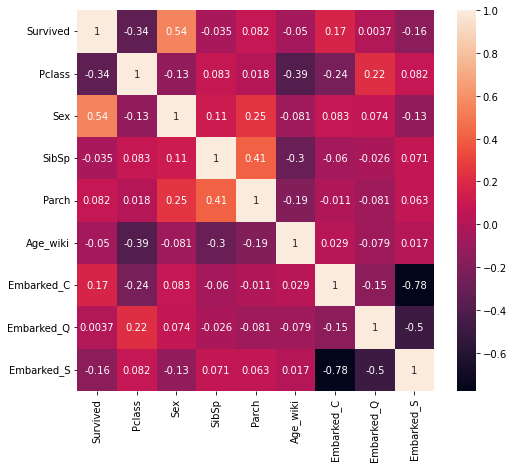

In [140]:
## Visualized Correlation Between Features and Target with Heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df_1.corr(),annot=True)
plt.show()
## Result: Outside Pclass and Sex, all other features only had correlation score below 0.2 with the target ('Survived')
### However, as we had perform Quick EDA, all of these features had proven to be correlated to the target (Survival Rates)

<hr>

## 2. Machine Learning Modelling

In [141]:
## Import Package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Splitting Data

In [142]:
## Define features and target
x=df_1.drop(columns='Survived')
y=df_1['Survived']

Example
- We have a dataset of 1000 data (100%), we would like to split them into Train 800 data (80%) and Test 200 data (20%) randomly.
- Our target consist of 2 labels, proportion is the same as our splitting proportion of 80:20
- Since we did the splitting randomly, there's always a chance that all 800 training data has only 1 label from the target and the rest 200 testing data has the other label from the target.
- Model will have a hard time to figure our the pattern of 20% label since it never learn/meet them on training set.
- Therefore, we use stratify=y in train_test_split

In [143]:
## Split with Stratify
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80, stratify=y,random_state=42)
## When creating train test split for classification, using stratify parameter is a MUST, so that splitting will be fair for every labels

In [144]:
## Build Base Model
model_LR=LogisticRegression()

In [145]:
## Fit Features and Target into Model
model_LR.fit(x_train,y_train)

LogisticRegression()

In [146]:
## Evaluation Matrix Accuracy Score for Training Set
model_LR.score(x_train,y_train)

0.8033707865168539

In [147]:
## Evaluation Matrix Accuracy Score for Testing Set
model_LR.score(x_test,y_test)

0.8100558659217877

In [148]:
## Predicted Target of Training Data
model_LR.predict(x_train[:10])

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0.])

<hr>

### **Confusion Matrix**

Actual/Prediction | 1 | 0
-----|-----|-----
1|True|False
0|False|True

Prediction Result:
- 1 = Positive = P
- 0 = Negative = N

Actual/Prediction | 1 (Predicted) | 0 (Predicted)
-----|-----|-----
1 (Actual)|True-Positive|False-Negative
0 (Actual)|False-Positive|True-Negative

Illustration
1. True-Positive: We predict Ronaldo will score a goal since its a simple tap-in and he did
![ronaldo](Ronaldo_tapin.jfif)
2. False-Negative: We predict Ronaldo won't score from a 70 yard free kick but he did spectacularly
![ronaldo](Ronaldo_freekick.jfif)
3. False-Positive: We predict Ronaldo will score easily from penalty spot but he miss
- ![ronaldo](Ronaldo_penalty.avif)
4. True-Negative: We predict Ronaldo won't score since there's many defenders in front of him and he miss 
![ronaldo](Ronaldo_blocked.jpg)

Relationship
1. False-Positive and False-Negative have trade-off relationship, which impact:
    - Recall and Precision (described below) is trade-off too if the class is the same
    - The higher the recall, the lower the precision
    - The higher the recall (+), the lower the recall (-)
    - Positive and Negative will be opposite if the metrics is same
    - Recall (+) and Precision (-) are linear
    - Recall (-) and Precision (+) are linear

Measurement
1. **Accuracy** : total `True` prediction / total prediction
    - From illustration above: Ronaldo will shot the ball 10 times. We predict how many of our guesses are right (Goal-Goal and NoGoal-NoGoal)
    - Accuracy could only be used when Dataset is Balance
    - Checking of Balance of Dataset could be performed with `df['target].value_counts()`, if one of the class is >75% then its Imbalanced Data
    - Accuracy simply is **Total of ALL CORRECT (True) prediction** compared to **Total of ALL prediction**

2. **Recall** : total `True` prediction in every class / total actual (*Horizontal*)
    - Positive : `True-Positive`
        - From illustration above: if Ronaldo score goals, how many of them we guess right ?
        - Case study 2: There are 100 persons in a hospital, we want to know how well Model can detect person with Covid-19 positive result in that group (Accuracy, but we only want to find the 'Positive' cases)
    - Negative : `True-Negative`
        - From illustration above: if Ronaldo didn't score goals, how many of them we guess right ?
    - Recall `Positive` and `Negative` has trade-off between them, since False-Negative and False-Positive themselves are trade-off too.

3. **Precision**
    - Positive: used when we targeted **False Positive to be as small as possible**
        - From illustration above: if Ronaldo shoot 10 times to the goal and 8 of them going into the net, then the level of positive precision is 80%. We only analyze our true guesses.
        - Case Study: *please refer to Case Study 1 below*

    - Negative: used when we targeted **False Negative to be as small as possible**
        - From illustration above: if Ronaldo shoot 10 times to the goal and he missed 2 of them, then the level of negative precision is 20%. We only analyze our true guesses.
        - Case Study: *please refer to Case Study 2 below*

4. **F1 Score**
    - Used for imbalanced data
    - False-Positive and False-Negative have high risk, so both need to be minimalized

Aim of Machine Learning : find the best Model which produce the lowest error

\begin{equation}
Accuracy = \frac{TP + TN} {TP + TN + FP + FN}
\end{equation}

\begin{equation}
Recall (+) = \frac{TP} {TP + FN}
\end{equation}

\begin{equation}
Recall (-) = \frac{TN} {FP + TN}
\end{equation}

\begin{equation}
Precision (+) = \frac{TP} {TP + FP}
\end{equation}

\begin{equation}
Precision (-) = \frac{TN} {TN + FN}
\end{equation}

\begin{equation}
F1Score (+) = 2 * \frac{Recall (+) * Precision (+)} {Recall (+) + Precision (+)}
\end{equation}

**Case Example 1**

- We want to build Machine Learning Model to predict spam and non-spam emails.
    - SPAM = Positive
    - NON-SPAM = Negative
- Error will be:
    1. We predict that it's a SPAM email but turns out its not (False Positive), or
    2. We predict that it's not a SPAM email but turns out it is (False Negative)
- Create 2 Box/Folder for each category -> SPAM folder and NON-SPAM folder
Insight:
    - Risk for False Positive will be higher (if we do cleaning on SPAM folder)
    - False Positive need to be minimalized
    - Measurement used is either Precision Positive or Recall Negative

**Case Example 2**

- We want to build Machine Learning Model to predict positive and negative result for COVID-19 test.
    - Positive/Reactive COVID-19 = Positive
    - Negative COVID-19 = Negative
- Error will be:
    1. We predict that it's a Positive/Reactive COVID-19 case but turns out its not (False Positive), or
    2. We predict that it's not Negative COVID-19 case but turns out it is (False Negative)
Insight:
    - Risk for False Negative will be higher (risk of spread of Covid-19 case and health risk for the patient, meanwhile if a person is suspected for Covid-19, he/she will undergo further test and could resulted in negative result in the further testing)
    - False Negative need to be minimalized
    - Measurement used is either Precision Negative or Recall Positive

**Evaluation Matrix**
- Evaluation Matrix score always ranging between 0 and 1
- The closer to 1 is better
- If Evaluation Matrix score above 0.98, most likely its too good to be true (need further analysis)
- If Evaluation Matrix score below 0.5, its too bad because the Model is worse than flipping a coin (need further analysis as well)

<hr>

## Evaluation Matrix

In [149]:
## Import Package
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

### Evaluation Matrix Training

In [150]:
## Predict with Model
y_pred_tr=model_LR.predict(x_train)

In [151]:
## Accuracy Score
accuracy_score(y_train,y_pred_tr)
## Result: score is above 0.80 (ideal)

0.8033707865168539

In [152]:
## Recall Score
recall_score(y_train,y_pred_tr)
## Result: score is below 0.80 (not ideal but acceptable)

0.7106227106227107

In [153]:
## Precision Score
precision_score(y_train,y_pred_tr)
## Result: score is below 0.80 (not ideal but acceptable)

0.7607843137254902

In [154]:
## F1 Score
f1_score(y_train,y_pred_tr)
## Result: score is below 0.80 (not ideal but acceptable)

0.7348484848484848

In [155]:
## Create Function to perform Evaluation Matrix scoring automatically
def EvaMatrix(model,x,y_true):
    y_pred=model.predict(x)
    acc=accuracy_score(y_true,y_pred)
    rec=recall_score(y_true,y_pred)
    prec=precision_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)
    return acc,rec,prec,f1

In [156]:
## Evaluation Matrix Training
LR_acc_tr,LR_rec_tr,LR_prec_tr,LR_f1_tr=EvaMatrix(model_LR,x_train,y_train)

## Evaluation Matrix Testing
LR_acc_ts,LR_rec_ts,LR_prec_ts,LR_f1_ts=EvaMatrix(model_LR,x_test,y_test)

In [157]:
## Create Function to Print Evaluation Matrix Score
data_LR={
    'Logistic Regression Training':[LR_acc_tr,LR_rec_tr,LR_prec_tr,LR_f1_tr],
    'Logistic Regression Testing':[LR_acc_ts,LR_rec_ts,LR_prec_ts,LR_f1_ts]
}

## Run as DataFrame
(pd.DataFrame(data_LR,index=['Accuracy','Recall','Precision','F1']).T).round(2)

,Accuracy,Recall,Precision,F1
Logistic Regression Training,0.80,0.71,0.76,0.73
Logistic Regression Testing,0.81,0.68,0.80,0.73


### Alternative

In [158]:
## Create Function to perform Evaluation Matrix scoring for Base Model
def EvaMatrix_Base(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    rec_train=recall_score(y_train,y_pred_train)
    prec_train=precision_score(y_train,y_pred_train)
    f1_train=f1_score(y_train,y_pred_train)

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test,y_pred_test)
    rec_test=recall_score(y_test,y_pred_test)
    prec_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data_LR_base={
    Nama + 'Training':[acc_train,rec_train,prec_train,f1_train],
    Nama + 'Testing':[acc_test,rec_test,prec_test,f1_test]
}

    df_LR=(pd.DataFrame(data_LR,index=['Accuracy','Recall','Precision','F1']).T).round(2)
    return df_LR

## Run DataFrame
EvaMatrix_Base(model_LR,x_train,x_test,y_train,y_test,'Base Model')

,Accuracy,Recall,Precision,F1
Logistic Regression Training,0.80,0.71,0.76,0.73
Logistic Regression Testing,0.81,0.68,0.80,0.73


<hr>

## Improvement by Model


### Improvement with Ridge (L2)

#### Without Solver

In [159]:
## Define Alphas
parameter_c=np.arange(0.001,5,0.001)

In [160]:
## Create Function to perform Evaluation Matrix scoring automatically
def ManualTune(c,x_train,x_test,y_train,y_test,Model):
    train_acc=[]
    test_acc=[]
    
    for i in c:
        model_R=Model(C=i,penalty='l2')
        model_R.fit(x_train,y_train)
        y_pred_train=model_R.predict(x_train)
        acc_train=accuracy_score(y_train,y_pred_train)
        train_acc.append(acc_train)

        y_pred_test=model_R.predict(x_test)
        acc_test=accuracy_score(y_test,y_pred_test)
        test_acc.append(acc_test)
    return train_acc,test_acc

In [161]:
## Fit Model
LogisticRegression(C=0.001,penalty='l2').fit(x_train,y_train)

LogisticRegression(C=0.001)

In [162]:
train_LR,test_LR=ManualTune(parameter_c,x_train,x_test,y_train,y_test,LogisticRegression)

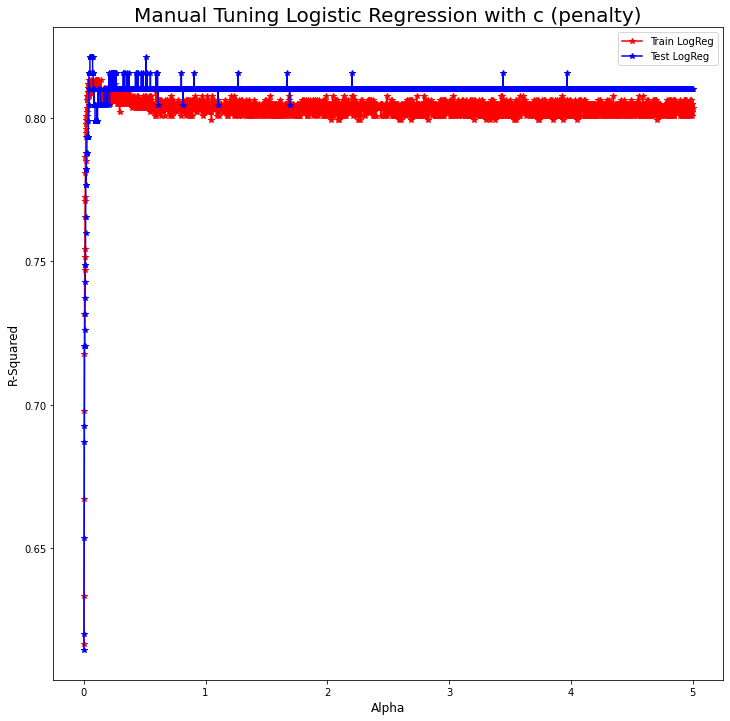

In [163]:
## Visualization
plt.figure(figsize=(12,12))
plt.plot(parameter_c,train_LR,'r*-')
plt.plot(parameter_c,test_LR,'b*-')
plt.legend(['Train LogReg','Test LogReg'])
plt.title('Manual Tuning Logistic Regression with c (penalty)',size=20)
plt.ylabel('R-Squared',size=12)
plt.xlabel('Alpha',size=12)
plt.show()

#### With Solver

In [164]:
## Create Function to perform Evaluation Matrix scoring automatically
def ManualTune(c,x_train,x_test,y_train,y_test,Model,Reg,slvr):
    train_acc=[]
    test_acc=[]
    ## Conditional Statement (if solver/regularization='elasticnet', then use l1_ratio of 0.5 -> could be tuned)
    ## Else Statement (if regularization [Reg]='l1' or 'l2', ratio= None)
    ## L1_ratio = proportion of Lasso, only appears on ElasticNet
    if Reg=='elasticnet':
        rat=0.5
    else:
        rat=None

    for i in c:
        model_R=Model(C=i,penalty=Reg,solver=slvr,l1_ratio=rat)
        model_R.fit(x_train,y_train)
        y_pred_train=model_R.predict(x_train)
        acc_train=accuracy_score(y_train,y_pred_train)
        train_acc.append(acc_train)

        y_pred_test=model_R.predict(x_test)
        acc_test=accuracy_score(y_test,y_pred_test)
        test_acc.append(acc_test)
    return train_acc,test_acc

In [165]:
## Improve with Ridge (L2)
train_LR_ridge,test_LR_ridge=ManualTune(parameter_c,x_train,x_test,y_train,y_test,LogisticRegression,'l2','lbfgs')

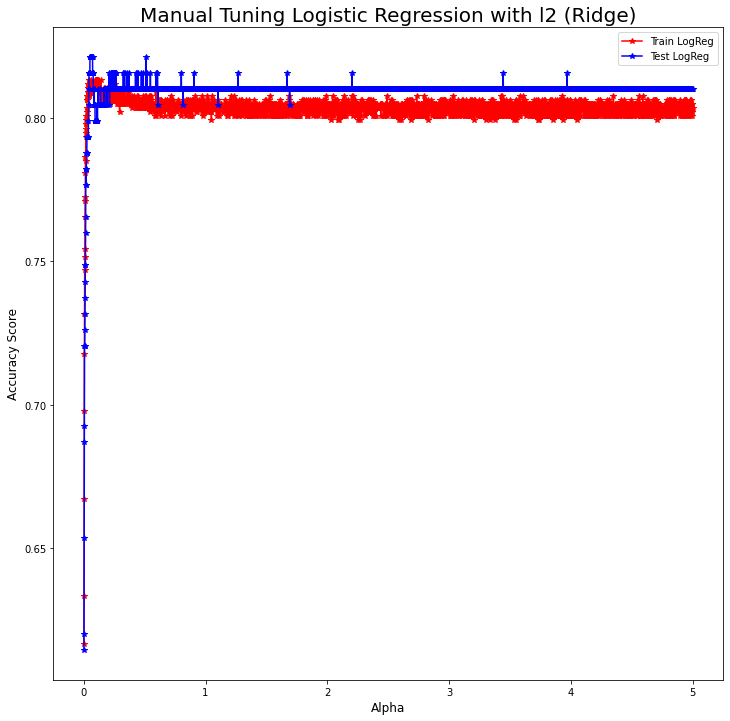

In [166]:
## Visualization
plt.figure(figsize=(12,12))
plt.plot(parameter_c,train_LR_ridge,'r*-')
plt.plot(parameter_c,test_LR_ridge,'b*-')
plt.legend(['Train LogReg','Test LogReg'])
plt.title('Manual Tuning Logistic Regression with l2 (Ridge)',size=20)
plt.ylabel('Accuracy Score',size=12)
plt.xlabel('Alpha',size=12)
plt.show()

In [167]:
print('Max Accuracy: ',np.max(test_LR_ridge))

Max Accuracy:  0.8212290502793296


<hr>

### Improvement with Lasso (L1)

In [168]:
## Improve with Lasso (L1)
train_LR_lasso,test_LR_lasso=ManualTune(parameter_c,x_train,x_test,y_train,y_test,LogisticRegression,'l1','liblinear')

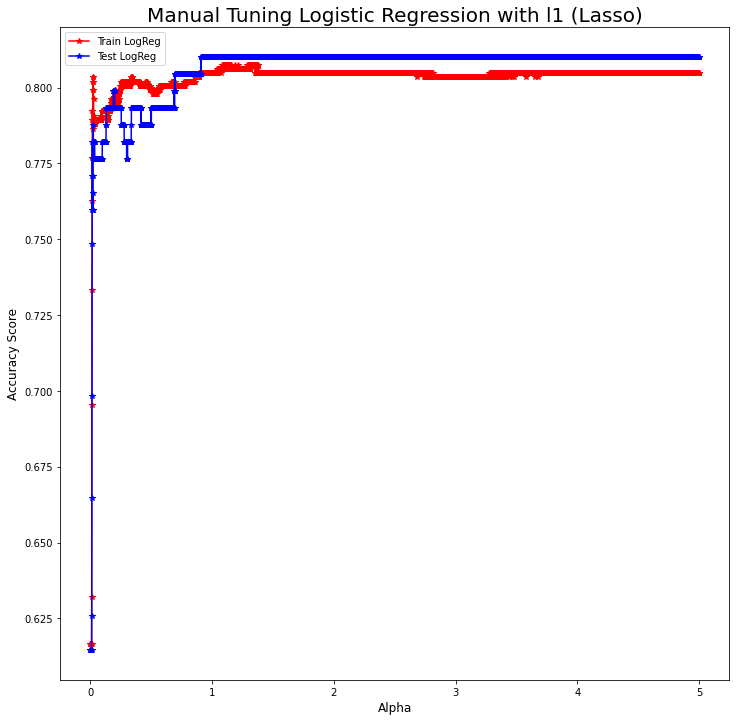

In [169]:
## Visualization
plt.figure(figsize=(12,12))
plt.plot(parameter_c,train_LR_lasso,'r*-')
plt.plot(parameter_c,test_LR_lasso,'b*-')
plt.legend(['Train LogReg','Test LogReg'])
plt.title('Manual Tuning Logistic Regression with l1 (Lasso)',size=20)
plt.ylabel('Accuracy Score',size=12)
plt.xlabel('Alpha',size=12)
plt.show()

In [170]:
print('Max Accuracy: ',np.max(test_LR_lasso))

Max Accuracy:  0.8100558659217877


<hr>

### Improvement with ElasticNet

In [171]:
train_LR_enet,test_LR_enet=ManualTune(parameter_c,x_train,x_test,y_train,y_test,LogisticRegression,'elasticnet','saga')

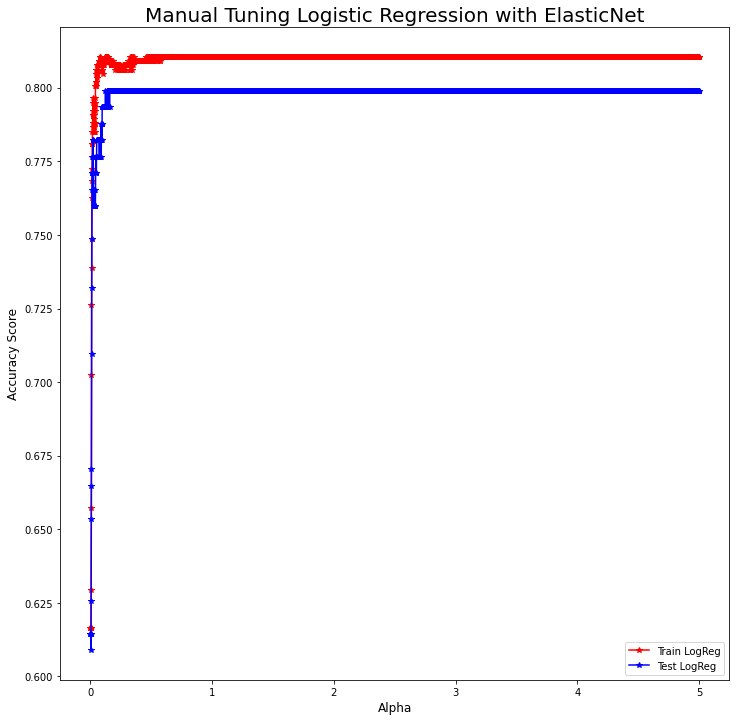

In [172]:
## Visualization
plt.figure(figsize=(12,12))
plt.plot(parameter_c,train_LR_enet,'r*-')
plt.plot(parameter_c,test_LR_enet,'b*-')
plt.legend(['Train LogReg','Test LogReg'])
plt.title('Manual Tuning Logistic Regression with ElasticNet',size=20)
plt.ylabel('Accuracy Score',size=12)
plt.xlabel('Alpha',size=12)
plt.show()

In [173]:
print('Max Accuracy: ',np.max(test_LR_enet))

Max Accuracy:  0.7988826815642458


### Fine Tuning

In [174]:
parameter_d=np.arange(0.001,1,0.001)

In [175]:
train_LR_ridge_2,test_LR_ridge_2=ManualTune(parameter_d,x_train,x_test,y_train,y_test,LogisticRegression,'l2','lbfgs')
train_LR_lasso_2,test_LR_lasso_2=ManualTune(parameter_d,x_train,x_test,y_train,y_test,LogisticRegression,'l1','liblinear')
train_LR_enet_2,test_LR_enet_2=ManualTune(parameter_d,x_train,x_test,y_train,y_test,LogisticRegression,'elasticnet','saga')

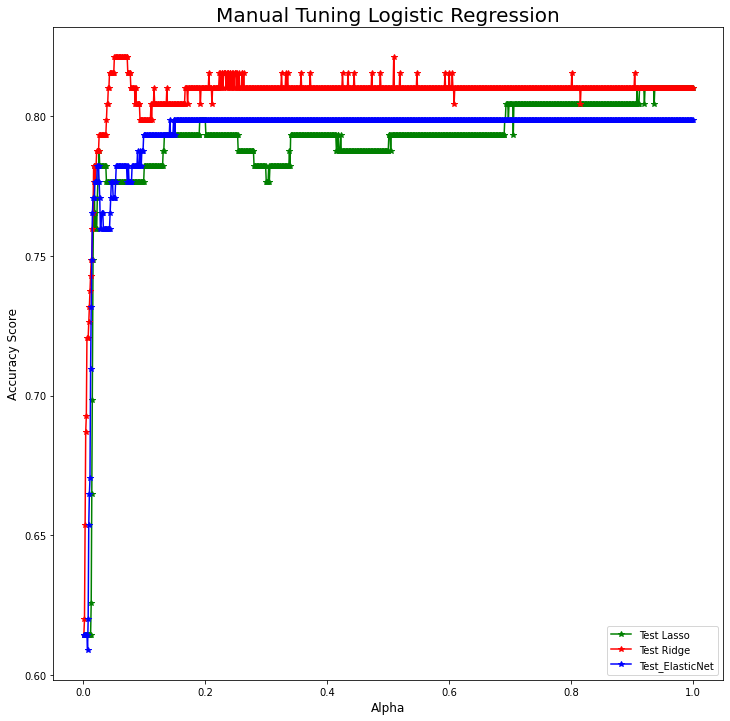

In [176]:
## Visualization
plt.figure(figsize=(12,12))
plt.plot(parameter_d,test_LR_lasso_2,'g*-')
plt.plot(parameter_d,test_LR_ridge_2,'r*-')
plt.plot(parameter_d,test_LR_enet_2,'b*-')
plt.legend(['Test Lasso','Test Ridge','Test_ElasticNet'])
plt.title('Manual Tuning Logistic Regression',size=20)
plt.ylabel('Accuracy Score',size=12)
plt.xlabel('Alpha',size=12)
plt.show()

In [177]:
print('Max Accuracy Lasso: ',np.max(test_LR_lasso_2))
print('Max Accuracy Ridge: ',np.max(test_LR_ridge_2))
print('Max Accuracy ElasticNet: ',np.max(test_LR_enet_2))

Max Accuracy Lasso:  0.8100558659217877
Max Accuracy Ridge:  0.8212290502793296
Max Accuracy ElasticNet:  0.7988826815642458


<hr>

## Improvement by Data

### Add / Modify Features

In [178]:
## Show data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,age_bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,Adult


#### 1. Title

In [179]:
## Sample Name
name='Futrelle, Mrs. Jacques Heath (Lily May Peel)'

## Extract Title
name.split(', ')[1].split('.')[0]

'Mrs'

In [180]:
## Assign Title
df['Title']=df['Name'].apply(lambda x:x.split(', ')[1].split('.')[0])
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [181]:
## Create function for binning
def modif_title(x):
    if x in ['Mr','Mrs','Master']:
        return x
    else:
        return 'Other'

## Assign to data
df['Title']=df['Title'].apply(modif_title)

## Confirm binning
df['Title'].value_counts()

Mr        517
Other     209
Mrs       125
Master     40
Name: Title, dtype: int64

#### 2. Parent-Children and Sibling-Spouse

In [182]:
## Determine passengers onboard alone (no sibling/parent/children/spouse)
(df['SibSp']==0)&(df['Parch']==0)

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

In [183]:
## Assign to column, if True = isAlone = 1, vice versa
df['isAlone']=(df['SibSp']==0)&(df['Parch']==0).astype('int')
df['isAlone'].value_counts()

True     537
False    354
Name: isAlone, dtype: int64

#### 3. Fare

In [184]:
## Highest ticket price
df['Fare'].max()

512.3292

In [185]:
## Lowest ticket price
df['Fare'].min()

0.0

In [186]:
## Determine label for each category
label_fare=['Sale','Regular','Special','Premium']

In [187]:
## Categorize into Class by ticket price
df['bin_fare']=pd.cut(df['Fare'],bins=4,labels=label_fare)

## Check total passengers per synthethize category
df['bin_fare'].value_counts()

Sale       853
Regular     29
Special      6
Premium      3
Name: bin_fare, dtype: int64

#### 4. Missing Value

In [188]:
## Check Missing Value per Features
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
WikiId           2
Name_wiki        2
Age_wiki         0
Hometown         2
Boarded          2
Destination      2
age_bin          0
Title            0
isAlone          0
bin_fare         0
dtype: int64

In [189]:
## Handling Missing Value
df['Age_wiki']=df['Age_wiki'].fillna(df['Age_wiki'].mean()) # fill with mean of feature
df['Embarked']=df['Embarked'].fillna('S') ## fill with mode of feature
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,age_bin,Title,isAlone,bin_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",Adult,Mr,False,Sale
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",Adult,Mrs,False,Sale
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,Adult,Other,True,Sale
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",Adult,Mrs,False,Sale
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,Adult,Mr,True,Sale


### Feature Selection

In [190]:
## Choose Features and Move into DataFrame
df_2=df[['Survived','Pclass','Sex','Embarked','Title','isAlone','bin_fare','age_bin']]
df_2

,Survived,Pclass,Sex,Embarked,Title,isAlone,bin_fare,age_bin
0,0.0,3,male,S,Mr,False,Sale,Adult
1,1.0,1,female,C,Mrs,False,Sale,Adult
2,1.0,3,female,S,Other,True,Sale,Adult
3,1.0,1,female,S,Mrs,False,Sale,Adult
4,0.0,3,male,S,Mr,True,Sale,Adult
...,...,...,...,...,...,...,...,...
886,0.0,2,male,S,Other,True,Sale,Adult
887,1.0,1,female,S,Other,True,Sale,Teenager
888,0.0,3,female,S,Other,False,Sale,Kids
889,1.0,1,male,C,Mr,True,Sale,Adult


### Encoding

In [191]:
## Encode Gender Feature with Binary Encoding
df_2['Sex']=df_2['Sex'].map({'male':0,'female':1})

In [192]:
## Encode Fare Category with Label Encoding
df_2['bin_fare']=df_2['bin_fare'].map({'Sale':0,'Regular':1,'Special':2,'Premium':3})

In [193]:
## Encode Age Category with Label Encoding
df_2['Age_bin']=df_2['age_bin'].map({'Kids':0,'Teenager':1,'Adult':2,'Senior':3})
df_2.drop(columns='age_bin',inplace=True)

In [194]:
## Encode Embarked and Title with One Hot Encoding
df_2=pd.get_dummies(df_2,columns=['Embarked','Title'])

In [195]:
## Show Data
df_2.head()

,Survived,Pclass,Sex,isAlone,bin_fare,Age_bin,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Other
0,0.0,3,0,False,0,2,0,0,1,0,1,0,0
1,1.0,1,1,False,0,2,1,0,0,0,0,1,0
2,1.0,3,1,True,0,2,0,0,1,0,0,0,1
3,1.0,1,1,False,0,2,0,0,1,0,0,1,0
4,0.0,3,0,True,0,2,0,0,1,0,1,0,0


### Re-Modelling
#### Splitting Data

In [196]:
## Define Features and Target
x_2=df_2.drop(columns='Survived')
y_2=df_2['Survived']

In [197]:
## Split Data
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_2,y_2,stratify=y_2,test_size=.20,random_state=42)

In [198]:
## Training Features
x_train_2.head()

,Pclass,Sex,isAlone,bin_fare,Age_bin,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Other
692,3,0,True,0,2,0,0,1,0,1,0,0
481,2,0,True,0,2,0,0,1,0,1,0,0
527,1,0,True,1,3,0,0,1,0,1,0,0
855,3,1,False,0,1,0,0,1,0,0,1,0
801,2,1,False,0,2,0,0,1,0,0,1,0


In [199]:
## Training Features' Size
x_train_2.shape

(712, 12)

In [200]:
## Testing Features' Size
x_test_2.shape

(179, 12)

In [201]:
## Build New Model to Prevent Data Leakage
model_LR2=LogisticRegression()

In [202]:
## Build new parameter for C-score
parameter_c_2=np.arange(0.001,1,0.001)

In [203]:
train_LR_2, test_LR_2 = ManualTune(parameter_c_2, x_train, x_test, y_train, y_test, LogisticRegression, 'l2', 'lbfgs')

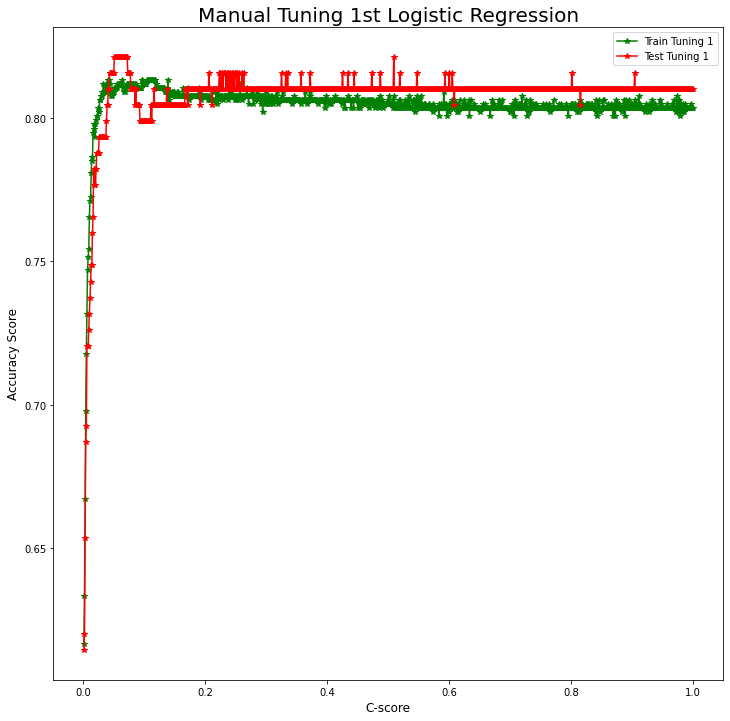

In [204]:
## Visualization
plt.figure(figsize=(12,12))
plt.plot(parameter_d,train_LR_2,'g*-')
plt.plot(parameter_d,test_LR_2,'r*-')
plt.legend(['Train Tuning 1','Test Tuning 1'])
plt.title('Manual Tuning 1st Logistic Regression',size=20)
plt.ylabel('Accuracy Score',size=12)
plt.xlabel('C-score',size=12)
plt.show()

In [205]:
## Determine Max Accuracy Score and its C-score
print('Max Accuracy : ',np.max(test_LR_2))
print('Best C-score : ',parameter_c_2[np.argmax(test_LR_2)])
best_C=parameter_c_2[np.argmax(test_LR_2)]

Max Accuracy :  0.8212290502793296
Best C-score :  0.051000000000000004


### Tuning 2

In [206]:
train_LR_3, test_LR_3 = ManualTune(parameter_c_2, x_train_2, x_test_2, y_train_2, y_test_2, LogisticRegression, 'l2', 'lbfgs')

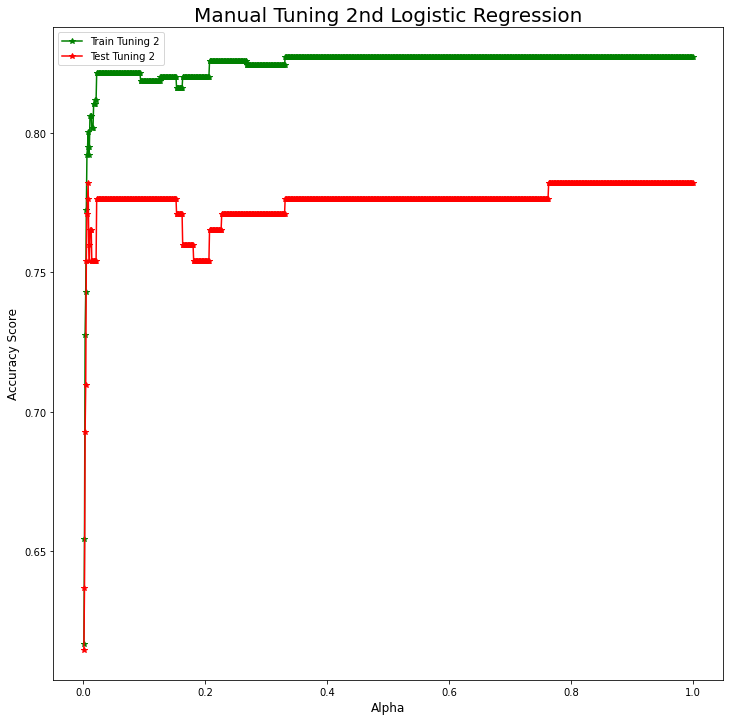

In [207]:
## Visualization
plt.figure(figsize=(12,12))
plt.plot(parameter_c_2,train_LR_3,'g*-')
plt.plot(parameter_c_2,test_LR_3,'r*-')
plt.legend(['Train Tuning 2','Test Tuning 2'])
plt.title('Manual Tuning 2nd Logistic Regression',size=20)
plt.ylabel('Accuracy Score',size=12)
plt.xlabel('Alpha',size=12)
plt.show()

In [208]:
## Determine Max Accuracy Score and its C-score
print('Max Accuracy : ',np.max(test_LR_3))
print('Best C-score : ',parameter_c_2[np.argmax(test_LR_3)])
best_C=parameter_c_2[np.argmax(test_LR_3)]

Max Accuracy :  0.7821229050279329
Best C-score :  0.008


In [209]:
## Assign best C-score to Model
LR_Tuned=LogisticRegression(C=best_C)
LR_Tuned.fit(x_train,y_train)

LogisticRegression(C=0.008)

### Confusion Matrix

In [210]:
## Import package
from sklearn.metrics import confusion_matrix,classification_report

### Training Set

In [211]:
## Predict with Model
y_Log=LR_Tuned.predict(x_train)

In [212]:
## Show Classification Report of New Model
print(classification_report(y_train,y_Log))

              precision    recall  f1-score   support

         0.0       0.72      0.97      0.83       439
         1.0       0.89      0.40      0.55       273

    accuracy                           0.75       712
   macro avg       0.80      0.69      0.69       712
weighted avg       0.79      0.75      0.72       712



In [213]:
## Build Confusion Matrix Model
cm_train=confusion_matrix(y_train,y_Log,labels=[1,0])
cm_train

array([[110, 163],
       [ 14, 425]], dtype=int64)

In [214]:
## Convert into DataFrame for Visualization
df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])
df_train

,Pred 1,Pred 0
Akt 1,110,163
Akt 0,14,425


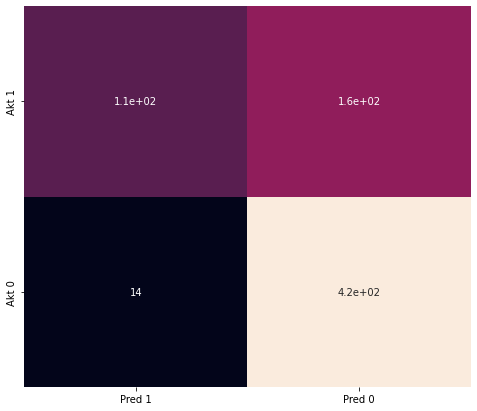

In [215]:
## Visualization
plt.figure(figsize=(8,7))
sns.heatmap(df_train, annot=True, cbar=False)
plt.show()

### Testing Set

In [216]:
## Predict with Model
y_Log_test=LR_Tuned.predict(x_test)

In [217]:
## Show Classification Report of New Model
print(classification_report(y_test,y_Log_test))

              precision    recall  f1-score   support

         0.0       0.70      0.96      0.81       110
         1.0       0.85      0.33      0.48        69

    accuracy                           0.72       179
   macro avg       0.77      0.65      0.64       179
weighted avg       0.76      0.72      0.68       179



In [218]:
## Build Confusion Matrix Model
cm_test=confusion_matrix(y_test,y_Log_test,labels=[1,0])
cm_test

array([[ 23,  46],
       [  4, 106]], dtype=int64)

In [219]:
## Convert into DataFrame for Visualization
df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])
df_test

,Pred 1,Pred 0
Akt 1,23,46
Akt 0,4,106


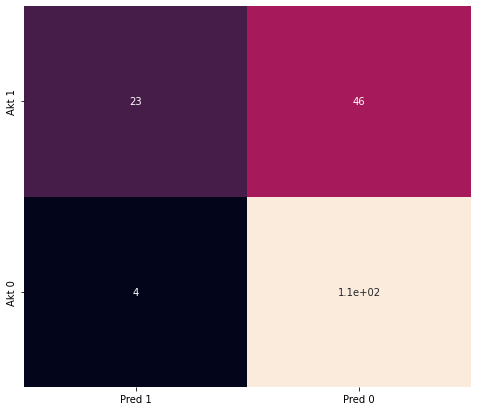

In [220]:
## Visualization
plt.figure(figsize=(8,7))
sns.heatmap(df_test, annot=True, cbar=False)
plt.show()